# Fase 4: Estrategia de cobertura como control

### Parte 1: Eliminación de la componente estocástica

1. Definición del portafolio  
   $$
   \Pi(t) = -\,V(S,t) + \Delta(t)\,S(t).
   $$

2. Ley de control (delta hedging)  
   $$
   \Delta(t) = \frac{\partial V}{\partial S}(S,t).
   $$

3. Dinámica del subyacente (GBM)  
   $$
   dS(t) = \mu\,S(t)\,dt + \sigma\,S(t)\,dB(t).
   $$

4. Fórmula de Itô para $V$  
   $$
   dV 
   = \Bigl(\partial_t V + \mu S\,\partial_S V + \tfrac12\sigma^2 S^2\,\partial^2_{SS}V\Bigr)\,dt
   + \Bigl(\sigma S\,\partial_S V\Bigr)\,dB(t).
   $$

5. Dinámica del portafolio  
   $$
   d\Pi = -\,dV + \Delta\,dS.
   $$

6. Sustitución y cancelación del término estocástico  
   Reemplazamos $dV$ y $dS$:

   $$
   \begin{aligned}
   d\Pi 
   &= -\Bigl[\partial_t V + \mu S\,\partial_S V + \tfrac12\sigma^2 S^2\,\partial^2_{SS}V\Bigr]\,dt
      - \sigma S\,\partial_S V\,dB \\
   &\quad + \Delta\;\bigl[\mu S\,dt + \sigma S\,dB\bigr]\\
   &= -(\partial_t V + \mu S\,\partial_S V + \tfrac12\sigma^2 S^2\,\partial^2_{SS}V)\,dt
      - \sigma S\,\partial_S V\,dB
      + \Delta\,\mu S\,dt
      + \Delta\,\sigma S\,dB.
   \end{aligned}
   $$

   Con $(\displaystyle \Delta=\partial_S V$), el término en $dB$ se anula:
   $$
   -\sigma S\,\partial_S V + \sigma S\,\partial_S V = 0,
   $$
   y queda  
   $$
   d\Pi = -\bigl[\partial_t V + \tfrac12\sigma^2 S^2\,\partial^2_{SS}V\bigr]\,dt.
   $$

---

### Parte 2: Ecuación de Black–Scholes

1. Portafolio libre de riesgo crece al tipo $r$  
   $$
   d\Pi = r\,\Pi\,dt.
   $$

2. Igualación con el resultado de la Parte 1
   - De la Parte 1:  
     $$
     d\Pi = -\bigl[\partial_t V + \tfrac12\sigma^2 S^2\,\partial^2_{SS}V\bigr]\,dt.
     $$
   - Además,  
     $$
     \Pi = -V + S\,\partial_S V
     \quad\Longrightarrow\quad
     r\,\Pi = r\bigl[-V + S\,\partial_S V\bigr].
     $$
   - Igualando coeficientes en $dt$:

     $$
     -\bigl[\partial_t V + \tfrac12\sigma^2 S^2\,\partial^2_{SS}V\bigr]
     = r\bigl[-V + S\,\partial_S V\bigr]
     \;\Longrightarrow\;
     \partial_t V + \tfrac12\sigma^2 S^2\,\partial^2_{SS}V + r\,S\,\partial_S V - r\,V = 0.
     $$

---

### 3. Derivación de la función de transferencia $G(s)$

1. Transformada de Laplace (condiciones iniciales nulas):
   $$
   s\,V(s)=A\,V(s)+B\,S(s)
   $$
2. Reordenando:
   $$
   (sI-A)\,V(s)=B\,S(s)
   $$
3. Multiplicando por la inversa resolvente:
   $$
   V(s)=(sI-A)^{-1}B\,S(s)
   $$
4. Definiendo la salida con $(y(t)=C\,v(t)$) (p. ej. nodo $i_0$):
   $$
   V_{\text{sal}}(s)=C\,V(s)
   $$

Por lo tanto,

$$
G(s)=\frac{V_{\text{sal}}(s)}{S(s)} = C\,(sI-A)^{-1}\,B
$$

El bloque de realimentación se fija igual a la *Delta* de la opción

$$
\Delta \;=\;\frac{\partial V}{\partial S}\Bigl|_{(S_0,t_0)} ,
$$

que mide la sensibilidad de $V$ al subyacente $S$.

Partimos del esquema linealizado

$$
\dot{\delta v}(t) \;=\; A\,\delta v(t) + B\,\delta S(t),
$$

con la ley proporcional

$$
\delta S(t) \;=\; S_{\text{ref}}(t) - K_f\,y(t), \qquad y(t)=C\,\delta v(t).
$$

Al elegir

$$
K_f \;=\; \Delta ,
$$

el lazo cerrado queda

$$
\dot{\delta v}(t) \;=\; \bigl(A - \Delta\,B\,C\bigr)\,\delta v(t) \;+\; B\,S_{\text{ref}}(t).
$$

* El término de frontera $b(t)$ introduce la información del subyacente.  
* Restar $(\Delta\,y(t)$) replica la cobertura de Delta - hedging: el sistema vende \(\Delta\) acciones cada vez que $(V$) sube una unidad, neutralizando el riesgo de primer orden.  
* En la aproximación lineal, $(\Delta$) es constante en torno a $((S_0,t_0)$), por eso aparece como un simple $(K_f$).




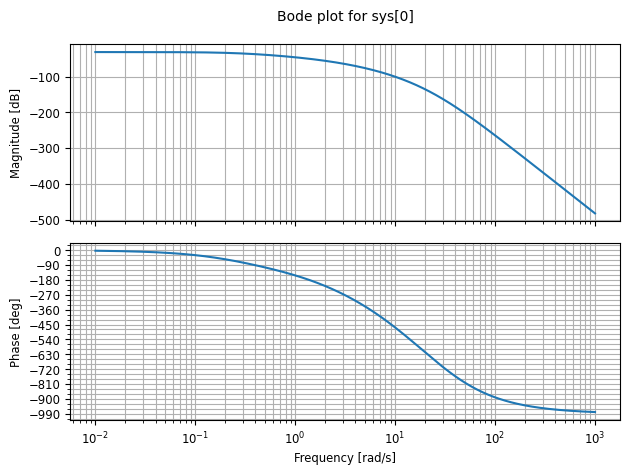

In [1]:
import numpy as np
import control as ctl
from matplotlib import pyplot as plt

# --- parámetros de la malla ---
N = 20           # nodos interiores
sigma = 0.2
r = 0.05
dx = 0.05

# Matriz A tridiagonal
alpha = 0.5*sigma**2 / dx**2
beta  = (r - 0.5*sigma**2)/(2*dx)
a = -2*alpha - r
b = alpha + beta
c = alpha - beta
A = np.diag([a]*(N-1)) + np.diag([b]*(N-2),1) + np.diag([c]*(N-2),-1)

# Vectores B y C
Kf = 1.0
B = np.zeros((N-1,1));  B[0,0] = Kf      # inyección en el nodo frontera izquierdo
C = np.zeros((1,N-1));  C[0,N//2] = 1    # observación del nodo central

# Sistema y Bode
sys = ctl.ss(A, B, C, 0)
ctl.bode(sys, dB=True, deg=True)
plt.show()